<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/CapstoneActual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





## Edilma G. Fields
## Master of Science in Data Science, Grand Canyon University
## UNI – 580: Designing and Creating Data Products
## October 12, 2022



## Generate an application to develop and optimize an approach to allow the USA to project/predict having 90% of the country's energy generated predominantly by renewable energy systems.



##Developing the infrastructure necessary that intensify the implementation of renewable energies, has become an addition to the Energy problem, not a solution since all implementations have been limited to infrastructure and not to the implementation of the development of efficient transmitters, collectors, batteries, or the optimization of mechanisms to achieve the effectiveness of the current system of electrical dependency with other factors like:
##According to new research… (Local Renewable Energy Benefits and Resources, 2022).	
###1)	Change the infrastructure of the power companies in the United States!
###2)	Efficiency and Reliability of the new power system
###3)	Space and Environment Protection 
###4)	Evaluate the accessibility of regional renewable resources
###5)	Engage investors, especially regarding siting.





##Import necesary lybraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from collections import Counter
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import *   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

import os
import sys
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pretty display for notebooks
%matplotlib inline

###Read the CSV file and display the first 5 Rows

In [ ]:
allmydata = pd.read_csv('/content/total2022.csv')
allmydata.head(5)

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION\n(Megawatthours)
0,2022,1,AK,Total Electric Power Industry,Total,584412
1,2022,1,AK,Total Electric Power Industry,Coal,75088
2,2022,1,AK,Total Electric Power Industry,Hydroelectric Conventional,198901
3,2022,1,AK,Total Electric Power Industry,Natural Gas,214245
4,2022,1,AK,Total Electric Power Industry,Other,-104


Checking some information to proof the data import.

In [ ]:
allmydata.shape

(12700, 6)

The user selected the state for the projec. in this case is California 'CA'

In [ ]:
mydata = allmydata[allmydata['STATE'] == 'CA']
 
print(mydata)

       YEAR  MONTH STATE                         TYPE OF PRODUCER  \
147    2022      1    CA            Total Electric Power Industry   
148    2022      1    CA            Total Electric Power Industry   
149    2022      1    CA            Total Electric Power Industry   
150    2022      1    CA            Total Electric Power Industry   
151    2022      1    CA            Total Electric Power Industry   
...     ...    ...   ...                                      ...   
10791  2022      6    CA  Electric Generators, Electric Utilities   
10792  2022      6    CA  Electric Generators, Electric Utilities   
10793  2022      6    CA  Electric Generators, Electric Utilities   
10794  2022      6    CA  Electric Generators, Electric Utilities   
10795  2022      6    CA  Electric Generators, Electric Utilities   

                        ENERGY SOURCE  GENERATION\n(Megawatthours)  
147                             Total                     14641676  
148                              

Data Confirmation information

In [ ]:
mydata.shape


(378, 6)

Check the data information we have integer 3 columns and 3 String columns

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        378 non-null    int64 
 1   MONTH                       378 non-null    int64 
 2   STATE                       378 non-null    object
 3   TYPE OF PRODUCER            378 non-null    object
 4   ENERGY SOURCE               378 non-null    object
 5   GENERATION
(Megawatthours)  378 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.7+ KB
None


Rename the columns names

In [ ]:
mydata.columns = ['YEAR','MONTH','STATE','PRODUCER','ENERGY','GENERATION']
print(mydata.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        378 non-null    int64 
 1   MONTH       378 non-null    int64 
 2   STATE       378 non-null    object
 3   PRODUCER    378 non-null    object
 4   ENERGY      378 non-null    object
 5   GENERATION  378 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.7+ KB
None


# Data Clean

Lost data can happen once no data is given for some items or for an entire component. Missing data is a extremely huge problem in a real-life situations.

In order to find missing values we used isna() function and sum to count the NaN values

In [ ]:
mydata.isna().sum() 

YEAR          0
MONTH         0
STATE         0
PRODUCER      0
ENERGY        0
GENERATION    0
dtype: int64

In [ ]:
mydata['YEAR'].value_counts()

2022    378
Name: YEAR, dtype: int64

In [ ]:
mydata['STATE'].value_counts()

CA    378
Name: STATE, dtype: int64

In [ ]:
mydata['PRODUCER'].value_counts()

Total Electric Power Industry                       84
Electric Generators, Electric Utilities             72
Combined Heat and Power, Industrial Power           60
Electric Generators, Independent Power Producers    60
Combined Heat and Power, Commercial Power           54
Combined Heat and Power, Electric Power             48
Name: PRODUCER, dtype: int64

In [ ]:
mydata = mydata.replace('Electric Generators, Electric Utilities',1)
mydata = mydata.replace('Combined Heat and Power, Industrial Power', 2)
mydata = mydata.replace('Electric Generators, Independent Power Producers',3)
mydata = mydata.replace('Combined Heat and Power, Commercial Power',4)
mydata = mydata.replace('Combined Heat and Power, Electric Power',5)
mydata = mydata.replace('Total Electric Power Industry',6)

mydata['PRODUCER'].value_counts()

6    84
1    72
2    60
3    60
4    54
5    48
Name: PRODUCER, dtype: int64

In [ ]:
mydata['ENERGY'].value_counts()

Total                             36
Natural Gas                       36
Other                             36
Petroleum                         36
Solar Thermal and Photovoltaic    36
Other Biomass                     36
Wind                              30
Hydroelectric Conventional        24
Wood and Wood Derived Fuels       24
Coal                              18
Geothermal                        18
Pumped Storage                    18
Other Gases                       18
Nuclear                           12
Name: ENERGY, dtype: int64

### Remove irrelevants columns 

In [ ]:
mydata.pop('YEAR')
mydata.pop('STATE')


147      CA
148      CA
149      CA
150      CA
151      CA
         ..
10791    CA
10792    CA
10793    CA
10794    CA
10795    CA
Name: STATE, Length: 378, dtype: object

Print the data information after remove the columns

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MONTH       378 non-null    int64 
 1   PRODUCER    378 non-null    int64 
 2   ENERGY      378 non-null    object
 3   GENERATION  378 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB
None


### Replace numerical value with string
### Replace all values from the Energy column that equal a specific variable

In [ ]:
mydata = mydata.replace('Natural Gas',1)
mydata = mydata.replace('Petroleum', 2)
mydata = mydata.replace('Coal',3)
mydata = mydata.replace('Other Biomass',4)
mydata = mydata.replace('Hydroelectric Conventional',5)
mydata = mydata.replace('Wood and Wood Derived Fuels',6)
mydata = mydata.replace('Other', 7)
mydata = mydata.replace('Wind',8)
mydata = mydata.replace('Other Gases', 9)
mydata = mydata.replace('Nuclear', 10)
mydata = mydata.replace('Solar Thermal and Photovoltaic', 11)
mydata = mydata.replace('Pumped Storage', 12)
mydata = mydata.replace('Geothermal', 13)
mydata = mydata.replace('Total',0)

mydata['ENERGY'].value_counts()


0     36
1     36
7     36
2     36
11    36
4     36
8     30
5     24
6     24
3     18
13    18
12    18
9     18
10    12
Name: ENERGY, dtype: int64

Drop a row or observation by condition in this case "total" - 0

In [ ]:
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
147        1         6       0    14641676
148        1         6       3       20157
149        1         6      13     1048443
150        1         6      12      -64301
151        1         6       5      999589
...      ...       ...     ...         ...
10791      6         1       7       -3571
10792      6         1       2        2779
10793      6         1      11       51604
10794      6         1       4         425
10795      6         1       8       94338

[378 rows x 4 columns]


In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       378 non-null    int64
 1   PRODUCER    378 non-null    int64
 2   ENERGY      378 non-null    int64
 3   GENERATION  378 non-null    int64
dtypes: int64(4)
memory usage: 14.8 KB
None


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

Function to calculate IOR for each numerical attribute and show skewness

In [ ]:
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return 

Relations between the numerical columns

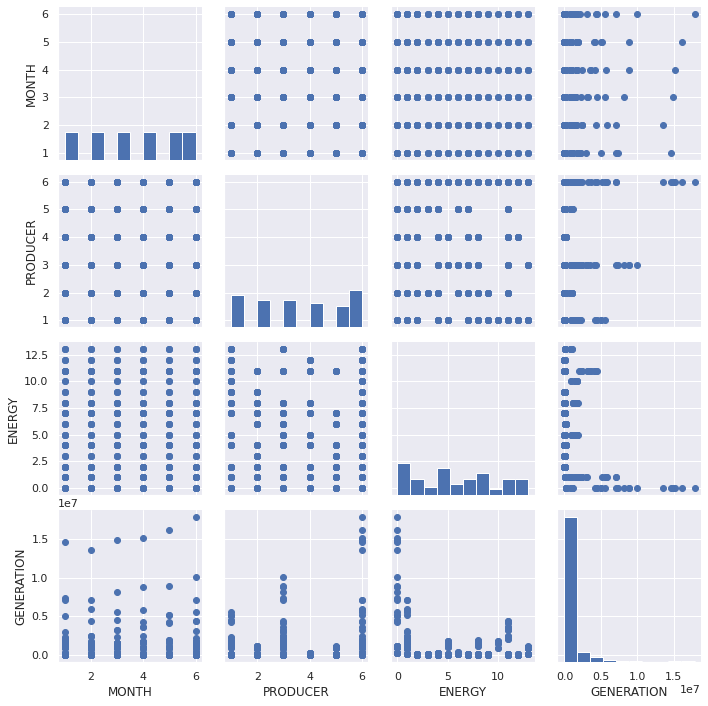

In [ ]:
g = sb.PairGrid(data = mydata)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e4dc5d790>,
      dtype=object)

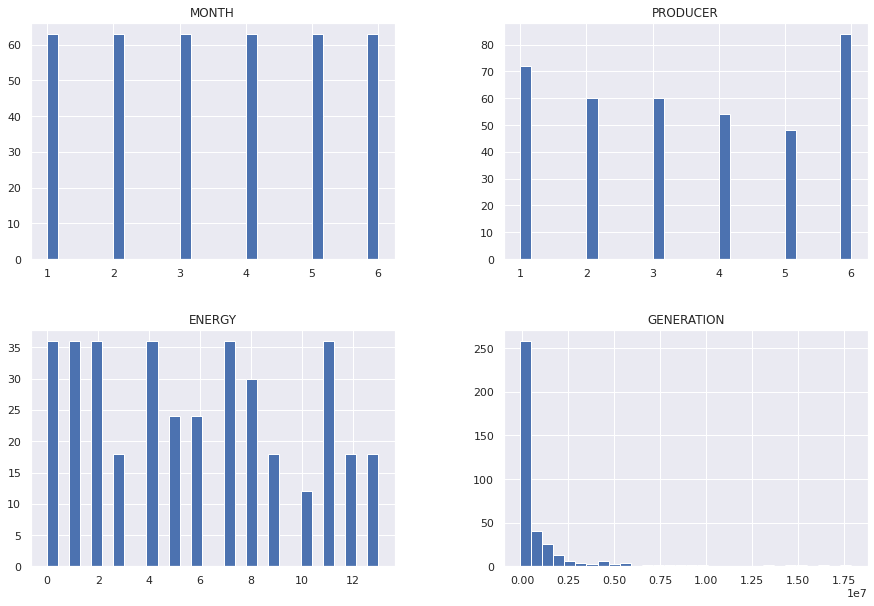

In [ ]:
mydata.hist(bins=30, figsize=(15, 10))

##Features correlation matrix

###To have an idea of correlation between our variables we can plot the correlation matrix.

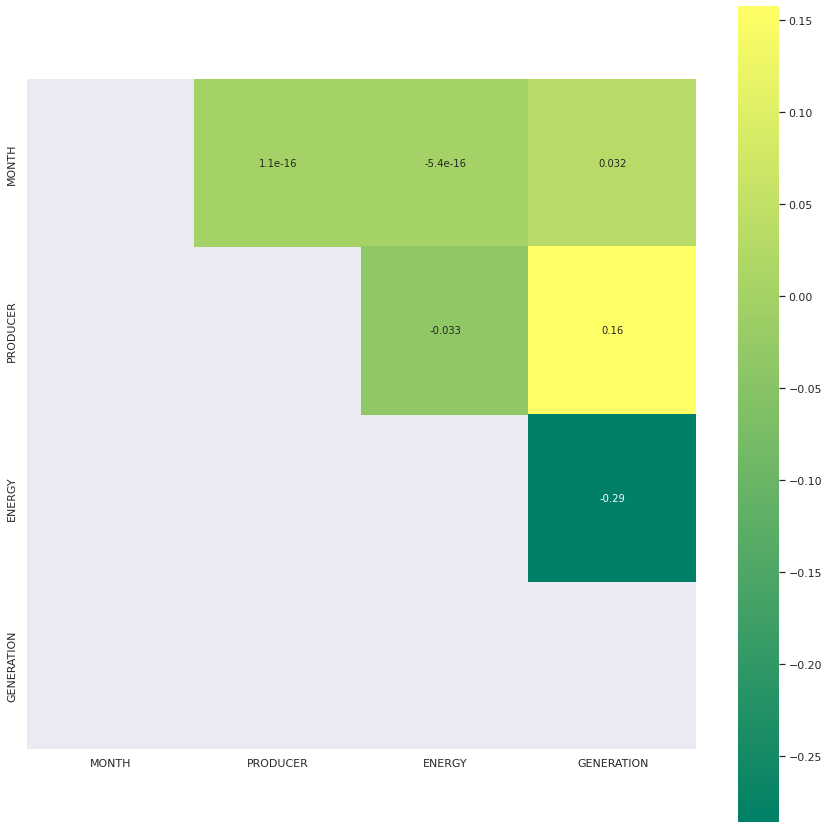

In [ ]:
plt.subplots(figsize=(15,15))
matrix = np.tril(mydata.corr())
sns.heatmap(mydata.corr(), annot = True, cmap= 'summer',square=True,mask = matrix)

Function definitions
Function for checking for outliers in the numeric value columns

In [ ]:
def outlier(var):
    high = np.mean(var) + 2*np.std(var)
    low = np.mean(var) - 2*np.std(var)
    outliers = (var >= high) | (var <= low)
    return outliers


Function to bin numerical columns

In [ ]:
def bins(X, n): 
    BinWidth = (max(X) - min(X))/n
    bound1 = float('-inf')
    bound2 = min(X) + 1 * BinWidth
    bound3 = min(X) + 2 * BinWidth
    bound4 = float('inf')
    Binned = np.array([" "]*len(X)) 
    Binned[(bound1 < X) & (X <= bound2)] = 1 # Low
    Binned[(bound2 < X) & (X <= bound3)] = 2 # Med
    Binned[(bound3 < X) & (X  < bound4)] = 3 # High
    return Binned

Function for z-standardization of a numerical column

In [ ]:
# Scaler
scalar = MinMaxScaler()

Remove/replace outliers for the numerical columns.
Replace outliers with median values for the numerical column, 'GENERATION'.

In [ ]:
outliers = outlier(mydata['GENERATION'])
mydata.loc[outliers, 'GENERATION'] = np.median(mydata.loc[:,"GENERATION"])

print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
147        1         6       0     62921.5
148        1         6       3     20157.0
149        1         6      13   1048443.0
150        1         6      12    -64301.0
151        1         6       5    999589.0
...      ...       ...     ...         ...
10791      6         1       7     -3571.0
10792      6         1       2      2779.0
10793      6         1      11     51604.0
10794      6         1       4       425.0
10795      6         1       8     94338.0

[378 rows x 4 columns]


# Data Visualization and Analysis

Text(0, 0.5, 'count')

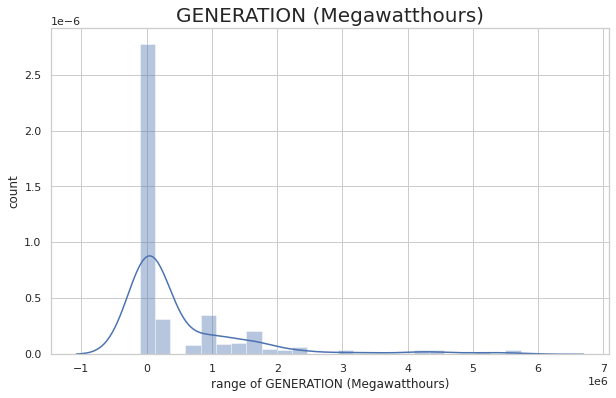

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['GENERATION'])
plt.title('GENERATION (Megawatthours)', fontsize = 20)
plt.xlabel('range of GENERATION (Megawatthours)')
plt.ylabel('count')

Text(6.5, 0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")

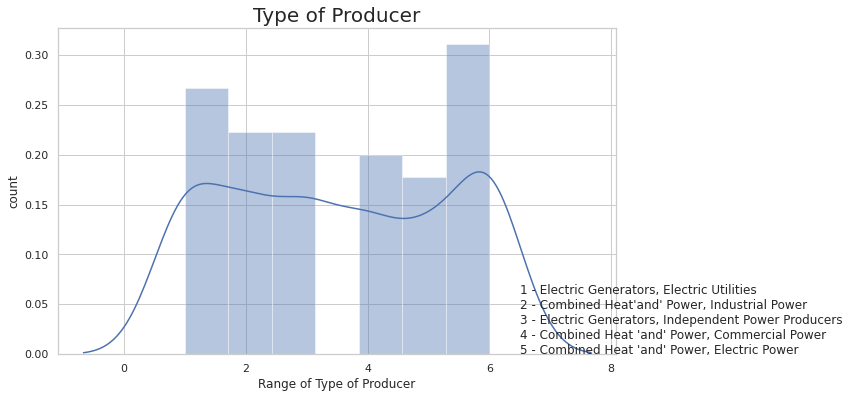

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['PRODUCER'])
plt.title('Type of Producer', fontsize = 20)
plt.xlabel('Range of Type of Producer')
plt.ylabel('count')
plt.text(6.5,0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")


Text(16, 0, '1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal')

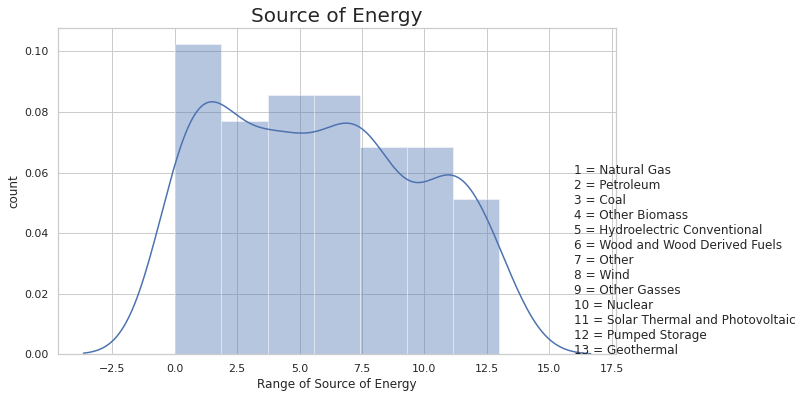

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['ENERGY'])
plt.title('Source of Energy', fontsize = 20)
plt.xlabel('Range of Source of Energy')
plt.ylabel('count')
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")


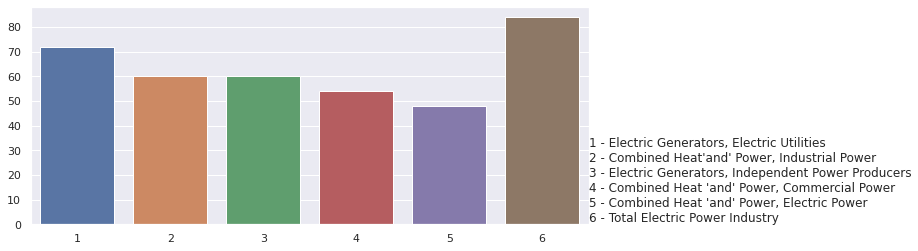

In [ ]:
PRODUCER = mydata.PRODUCER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=PRODUCER.index, y=PRODUCER.values)
plt.text(5.5,1, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

##Observing Correlation between features of the Dataset

In [ ]:
correlation = mydata.corr()

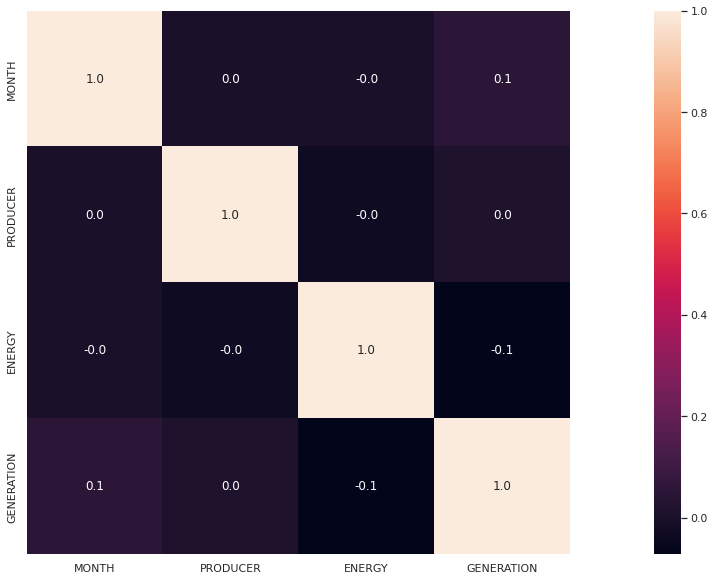

In [ ]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

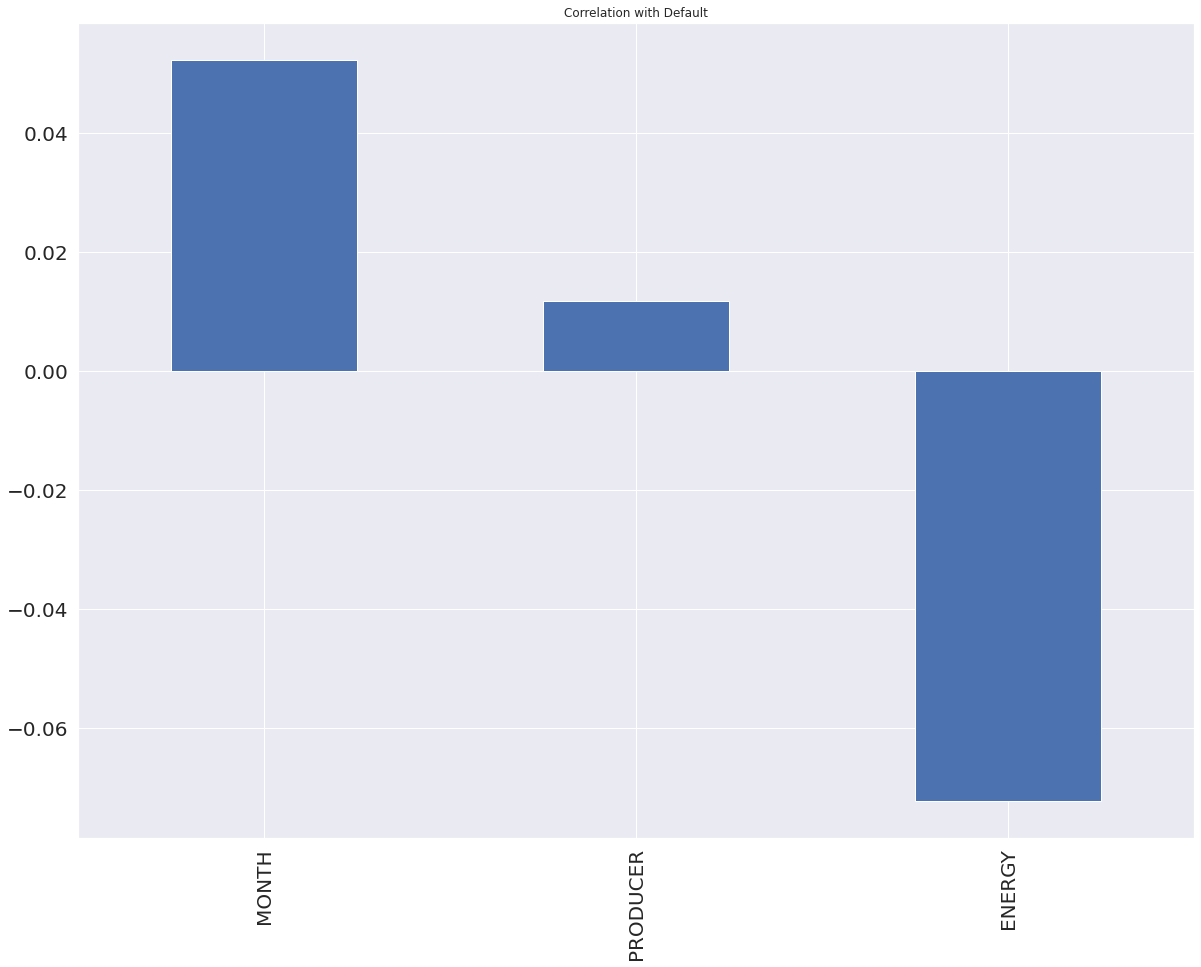

In [ ]:
X = mydata.drop(['GENERATION'],axis=1)
X.corrwith(mydata['GENERATION']).plot.bar(figsize = (20, 15), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

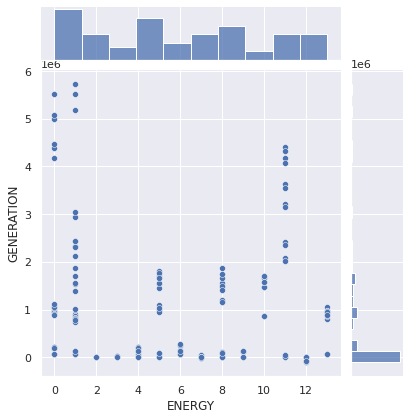

In [ ]:
sns.jointplot(x='ENERGY',y='GENERATION',data=mydata,kind="scatter")

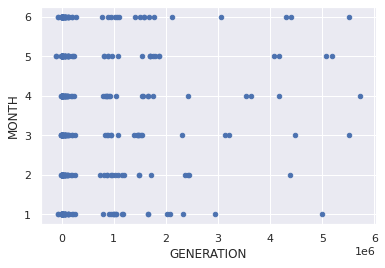

In [ ]:
mydata.plot(x = 'GENERATION', y = 'MONTH', kind='scatter')

In [ ]:
mydata.corr()

,MONTH,PRODUCER,ENERGY,GENERATION
MONTH,1.000000e+00,1.060792e-16,-5.416919e-16,0.052386
PRODUCER,1.060792e-16,1.000000e+00,-3.325850e-02,0.011785
ENERGY,-5.416919e-16,-3.325850e-02,1.000000e+00,-0.072302
GENERATION,5.238616e-02,1.178540e-02,-7.230234e-02,1.000000


In [ ]:
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
147        1         6       0     62921.5
148        1         6       3     20157.0
149        1         6      13   1048443.0
150        1         6      12    -64301.0
151        1         6       5    999589.0
...      ...       ...     ...         ...
10791      6         1       7     -3571.0
10792      6         1       2      2779.0
10793      6         1      11     51604.0
10794      6         1       4       425.0
10795      6         1       8     94338.0

[378 rows x 4 columns]


Normalize values for the numerical columns by z-standardization

Normalize the GENERATION column; plot the normalized GENERATION data.

In [ ]:
col = mydata["GENERATION"]
mydata["GENERATION"] = norm(col)
print(mydata)

       MONTH  PRODUCER  ENERGY  GENERATION
147        1         6       0   -0.459976
148        1         6       3   -0.500472
149        1         6      13    0.473264
150        1         6      12   -0.580449
151        1         6       5    0.427002
...      ...       ...     ...         ...
10791      6         1       7   -0.522941
10792      6         1       2   -0.516928
10793      6         1      11   -0.470693
10794      6         1       4   -0.519157
10795      6         1       8   -0.430226

[378 rows x 4 columns]


In [ ]:
mydata.head(5)

,MONTH,PRODUCER,ENERGY,GENERATION
147,1,6,0,-0.459976
148,1,6,3,-0.500472
149,1,6,13,0.473264
150,1,6,12,-0.580449
151,1,6,5,0.427002


Text(0.5, 1.0, 'Month')

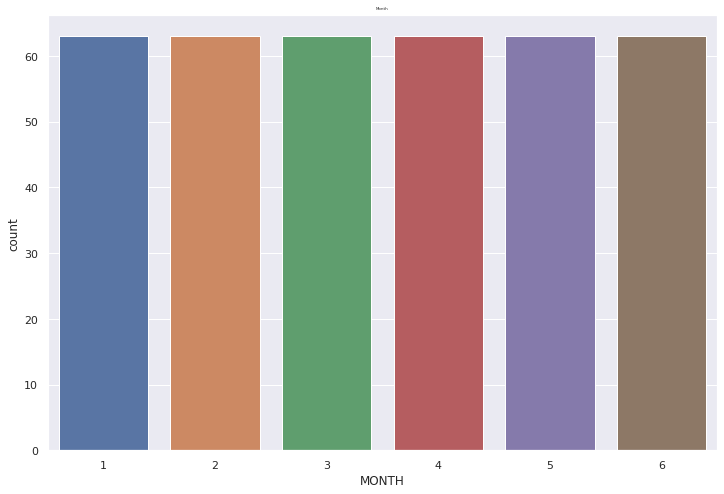

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(mydata.MONTH.dropna(), order = mydata.MONTH.value_counts().index);
plt.title('Month', fontsize = 4)

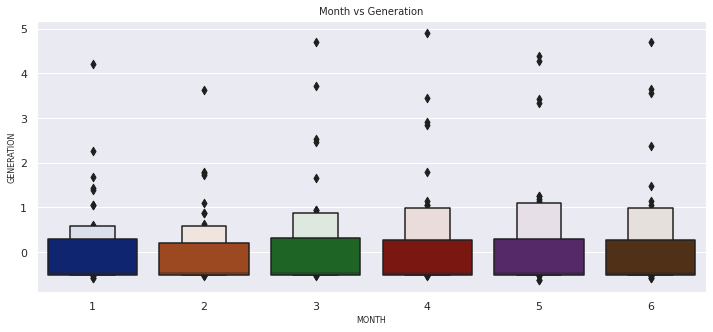

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Month
sns.boxenplot(mydata['MONTH'], mydata['GENERATION'], palette = 'dark')
plt.title('Month vs Generation', fontsize = 10)
plt.xlabel('MONTH', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)

plt.show()

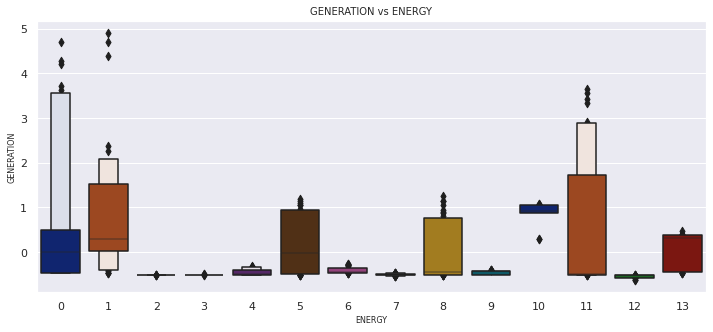

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)

plt.show()

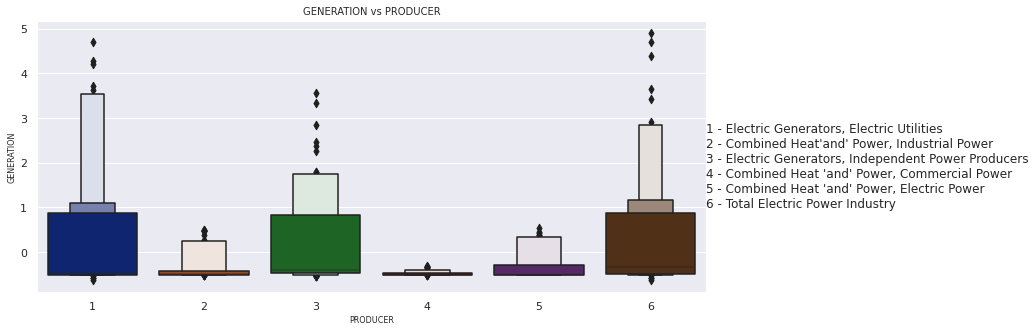

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
# exit Generation vrs Producer
sns.boxenplot(mydata['PRODUCER'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs PRODUCER', fontsize = 10)
plt.xlabel('PRODUCER', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(5.5,1, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

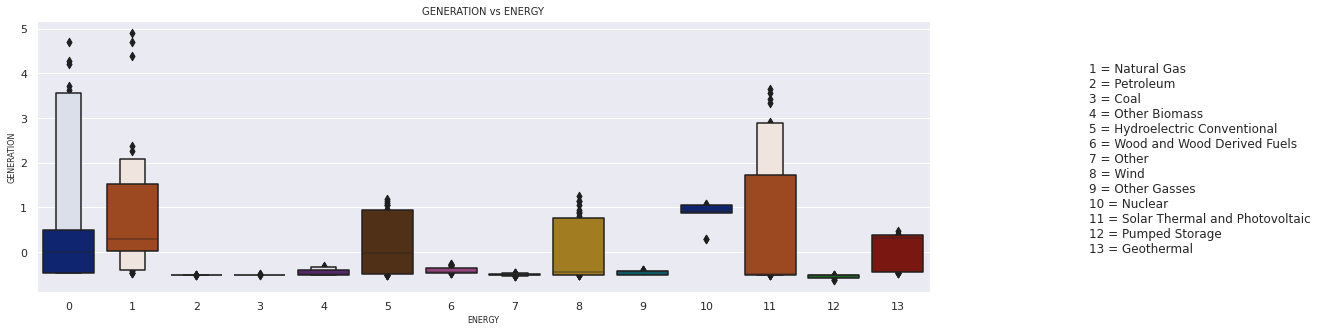

In [ ]:
plt.rcParams['figure.figsize'] = (16, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")
plt.show()

The violin plot is showing us the same pattern for each visitor type. Page Value for most of the entries are close to 0 when the Revenue is False. But the values are spread out when Revenue is True. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not generate a lot of revenue.

Transform "GENERATION" float to integer

In [ ]:
mydata['GENERATION'] = mydata['GENERATION'].astype(int) 

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       378 non-null    int64
 1   PRODUCER    378 non-null    int64
 2   ENERGY      378 non-null    int64
 3   GENERATION  378 non-null    int64
dtypes: int64(4)
memory usage: 22.9 KB
None


##Spiliting Dataset into training(75%) and test set(25%)

In [ ]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values
y = y.astype('int')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

X_train.shape

(283, 3)

Look up the target y


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 3, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0,

###Split data records

In [ ]:
X_train

array([[ 6,  4,  5],
       [ 5,  1,  8],
       [ 6,  2,  1],
       [ 1,  1,  2],
       [ 1,  6,  8],
       [ 5,  5,  4],
       [ 2,  1,  5],
       [ 2,  4,  7],
       [ 6,  3,  2],
       [ 6,  1,  8],
       [ 3,  6,  6],
       [ 1,  4,  2],
       [ 2,  2,  8],
       [ 1,  1,  7],
       [ 3,  3,  8],
       [ 5,  1, 12],
       [ 4,  3,  7],
       [ 3,  5,  4],
       [ 4,  4,  0],
       [ 6,  4,  4],
       [ 6,  2,  6],
       [ 4,  3,  8],
       [ 4,  5,  7],
       [ 6,  1,  5],
       [ 2,  2,  9],
       [ 2,  4, 12],
       [ 5,  4,  5],
       [ 6,  1, 10],
       [ 5,  6,  2],
       [ 6,  3, 11],
       [ 5,  2,  2],
       [ 1,  2,  0],
       [ 1,  2,  6],
       [ 4,  2,  3],
       [ 2,  1, 11],
       [ 2,  3,  4],
       [ 1,  1,  0],
       [ 2,  3,  8],
       [ 1,  6,  2],
       [ 3,  5,  7],
       [ 1,  2,  1],
       [ 3,  5,  3],
       [ 1,  6,  0],
       [ 2,  3, 13],
       [ 5,  1,  2],
       [ 3,  1,  8],
       [ 2,  6,  9],
       [ 1,  

In [ ]:
X_test

array([[ 3,  6,  8],
       [ 4,  4, 12],
       [ 2,  4,  1],
       [ 3,  5,  1],
       [ 2,  5,  4],
       [ 3,  1,  2],
       [ 4,  5,  0],
       [ 3,  6,  1],
       [ 2,  1, 10],
       [ 2,  6, 13],
       [ 4,  1,  1],
       [ 3,  1, 12],
       [ 6,  6,  1],
       [ 1,  1,  8],
       [ 1,  6,  1],
       [ 3,  6, 10],
       [ 5,  4, 12],
       [ 6,  5,  6],
       [ 5,  3, 11],
       [ 4,  1,  2],
       [ 4,  5,  4],
       [ 1,  6, 10],
       [ 5,  5,  3],
       [ 3,  3,  4],
       [ 2,  1,  9],
       [ 2,  2,  3],
       [ 1,  6,  5],
       [ 5,  3,  4],
       [ 2,  3,  1],
       [ 2,  6,  5],
       [ 4,  6,  0],
       [ 6,  1, 11],
       [ 4,  6,  7],
       [ 5,  3,  5],
       [ 2,  2,  7],
       [ 5,  2,  3],
       [ 6,  3,  4],
       [ 4,  6, 12],
       [ 2,  1,  4],
       [ 2,  1,  8],
       [ 1,  2,  9],
       [ 5,  2,  6],
       [ 3,  3,  0],
       [ 6,  2,  8],
       [ 6,  6, 10],
       [ 3,  5,  0],
       [ 6,  4,  2],
       [ 6,  

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0])

#Principal Component Analysis
We can use principal component analysis to see if we can have a good representation of our dataset in two or three dimensions.

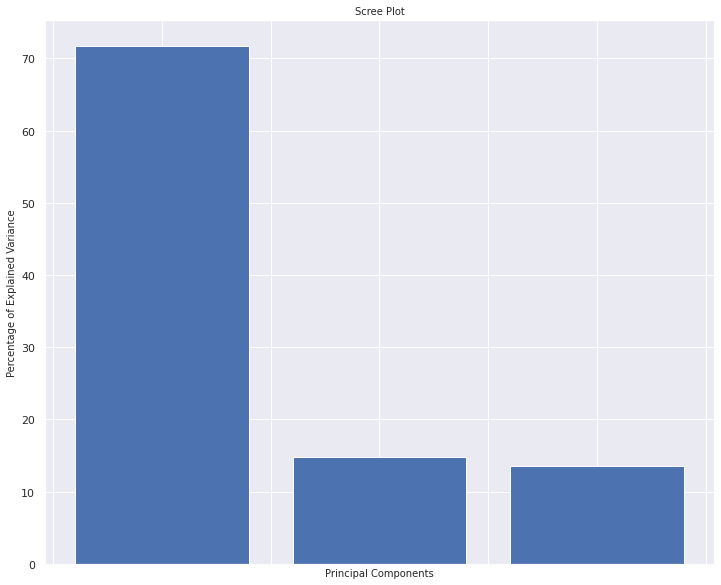

In [ ]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(X) for x in range(1,len(per_var)+1)]
plt.rcParams['figure.figsize'] = (12, 10)
font=10
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()

Because the percentage of explained variance decay slowly, it is not possible to represent well our dataset in two or three dimensions.
2D PCA Plot
We can have a look at our dataset in a 2D Plot.

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 147 to 10795
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MONTH       378 non-null    int64
 1   PRODUCER    378 non-null    int64
 2   ENERGY      378 non-null    int64
 3   GENERATION  378 non-null    int64
dtypes: int64(4)
memory usage: 22.9 KB
None


##Building ML Model
#Overview of a few model's performance

Let's compare a few algorithms that can be used for classification to see the performance of each ones.

Applying Machine Learning Algorithm for Classification Problem
Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>
<class 'sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay'>


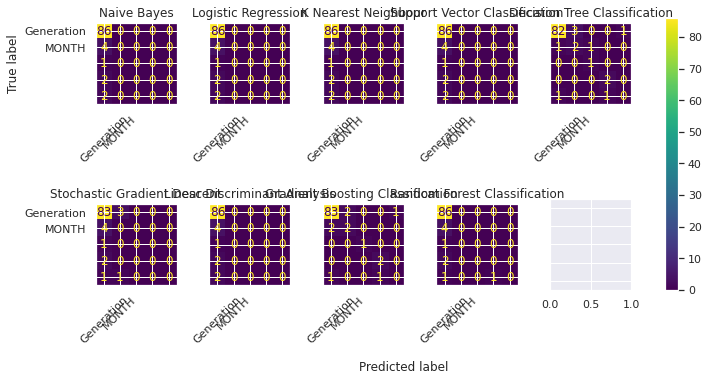

In [ ]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(12, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(ConfusionMatrixDisplay)
    #print(key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    #print("GENERATION : ",mydata.GENERATION(y_test, y_pred, 
    #                                       pos_label='positive'))
    #print("MONTH : ",mydata.MONTH(y_test, y_pred, 
    #                                       pos_label='positive'))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Generation","MONTH"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

##Bivariate analysis

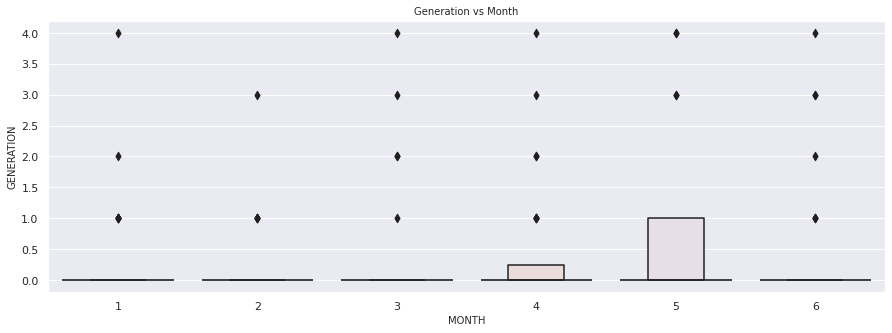

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
# exit rate vs raevenue
sns.boxenplot(mydata['MONTH'], mydata['GENERATION'], palette = 'dark')
plt.title('Generation vs Month', fontsize = 10)
plt.xlabel('MONTH', fontsize = 10)
plt.ylabel('GENERATION', fontsize = 10)

plt.show()

## Stochastic Gradient Descent

### 

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [ ]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model
Model	Accuracy	Precision	Recall	F1 Score	

SyntaxError: ignored

##K-Nearest Neighbour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

Text(0, 0.5, 'Error Rate')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

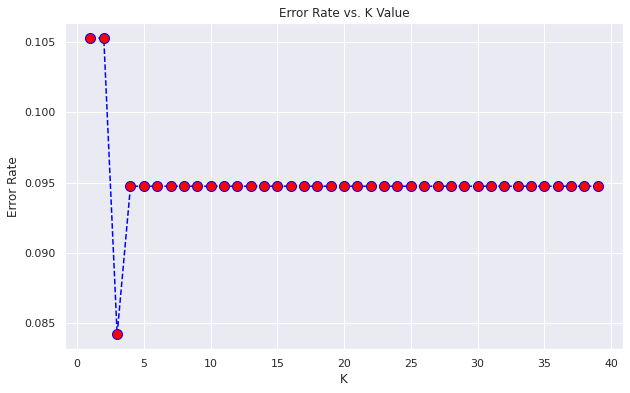

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)



from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

ValueError: ignored

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

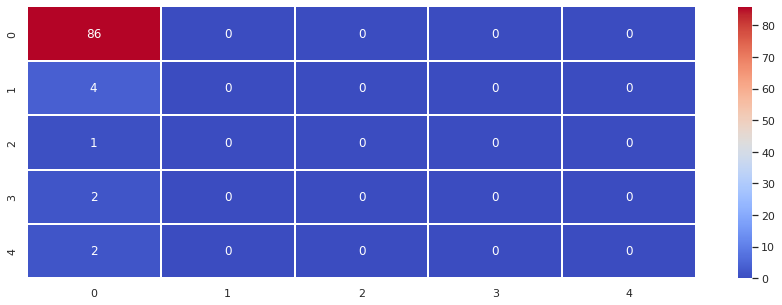

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')